In [25]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('eth_usd_dataset.csv', header=0, skiprows=[1])

In [4]:
print(df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

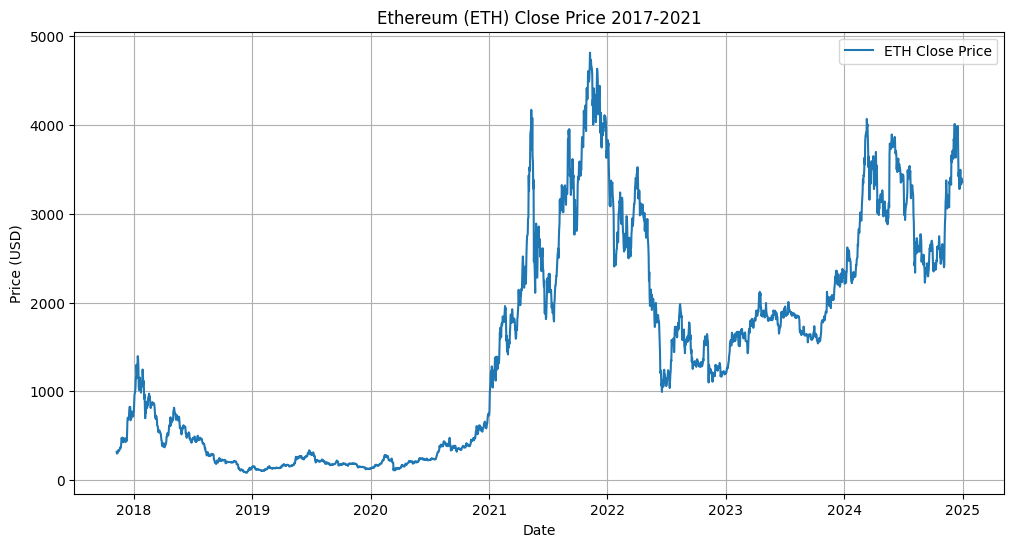

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='ETH Close Price')
plt.title('Ethereum (ETH) Close Price 2017-2021')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print(df['Close'].describe())

count    2609.000000
mean     1490.773764
std      1226.266551
min        84.308296
25%       268.704041
50%      1352.837158
75%      2405.181152
max      4812.087402
Name: Close, dtype: float64


In [8]:
df['MA_30'] = df['Close'].rolling(window=30).mean()

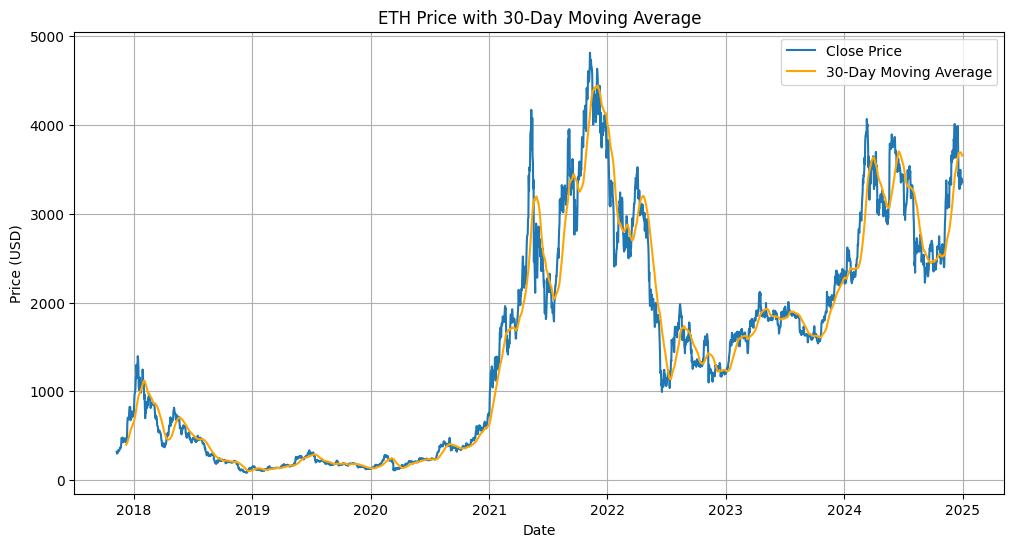

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_30'], label='30-Day Moving Average', color='orange')
plt.title('ETH Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df['Close'], 14)

In [11]:
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']

In [12]:
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
df['BB_Std'] = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + (df['BB_Std'] * 2)
df['BB_Lower'] = df['BB_Middle'] - (df['BB_Std'] * 2)
df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle'] * 100

In [13]:
df['TR'] = pd.DataFrame({
    'HL': df['High'] - df['Low'],
    'HC': abs(df['High'] - df['Close'].shift()),
    'LC': abs(df['Low'] - df['Close'].shift())
}).max(axis=1)
df['ATR_14'] = df['TR'].rolling(window=14).mean()

In [14]:
df['Momentum_10'] = df['Close'] - df['Close'].shift(10)
df['ROC_10'] = (df['Close'] - df['Close'].shift(10)) / df['Close'].shift(10) * 100

In [15]:
one_year_ago = df.index[-1] - pd.DateOffset(years=1)
recent_data = df.loc[one_year_ago:]
high = recent_data['High'].max()
low = recent_data['Low'].min()
diff = high - low

In [16]:
fib_levels = {
    '0.0%': high,
    '23.6%': high - diff * 0.236,
    '38.2%': high - diff * 0.382,
    '50.0%': high - diff * 0.5,
    '61.8%': high - diff * 0.618,
    '78.6%': high - diff * 0.786,
    '100.0%': low
}

In [18]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.dayofweek
df['Quarter'] = df.index.quarter

In [26]:
monthly_returns = df['Close'].resample('M').last().pct_change()
yearly_returns = df['Close'].resample('Y').last().pct_change()